In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sys
print("Python version", sys.version)

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [3]:
df = pd.read_csv("Datas/early_brain_strokes_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [5]:
stroke_df = df[df["stroke"]==1]
normal_df = df[df["stroke"]==0]
stroke_df.shape, normal_df.shape

((783, 12), (42617, 12))

In [6]:
normal_df = normal_df.dropna()
normal_df.shape

(28524, 12)

In [7]:
normal_df = normal_df.sample(frac=1, random_state=1)
normal_df = normal_df.iloc[:783, :]
normal_df.shape

(783, 12)

In [8]:
concat_df = pd.concat([stroke_df, normal_df])
df = concat_df.sample(frac=1, random_state=5)

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
26241,32328,Male,72.0,0,0,Yes,Private,Urban,111.88,26.2,formerly smoked,1
43027,2523,Male,70.0,0,0,Yes,Self-employed,Urban,104.74,29.4,smokes,0
34720,48211,Female,61.0,1,1,Yes,Private,Urban,251.99,41.4,formerly smoked,1
27028,66496,Female,43.0,0,0,No,Self-employed,Urban,63.24,35.4,never smoked,0
3099,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status       145
stroke                 0
dtype: int64

In [11]:
df["bmi"] = df["bmi"].fillna(np.mean(df["bmi"]))
df["smoking_status"] = df["smoking_status"].fillna("Unknown")

1    783
0    783
Name: stroke, dtype: int64

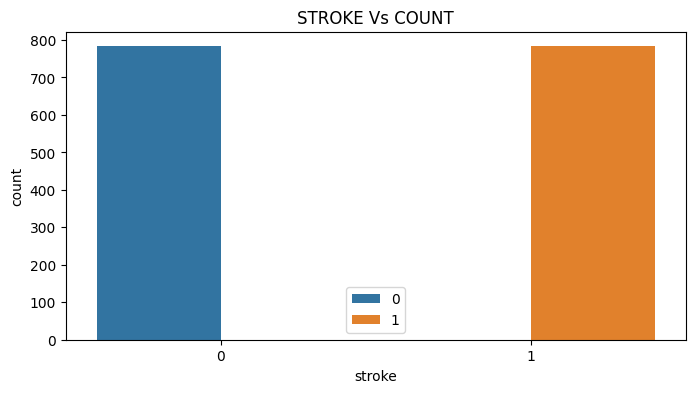

In [22]:
plot_category(df["stroke"])
df["stroke"].value_counts()

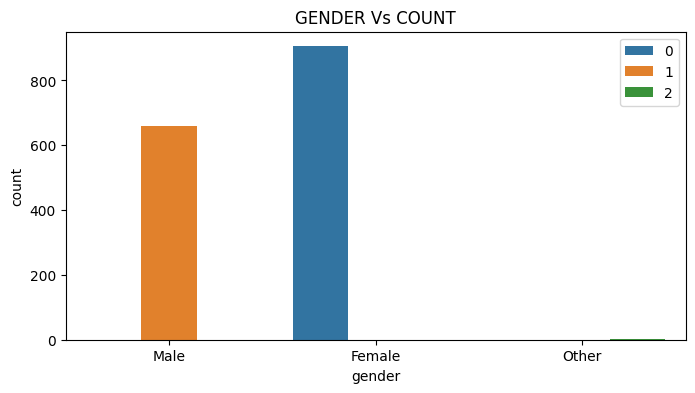

In [23]:
plot_category(df["gender"])

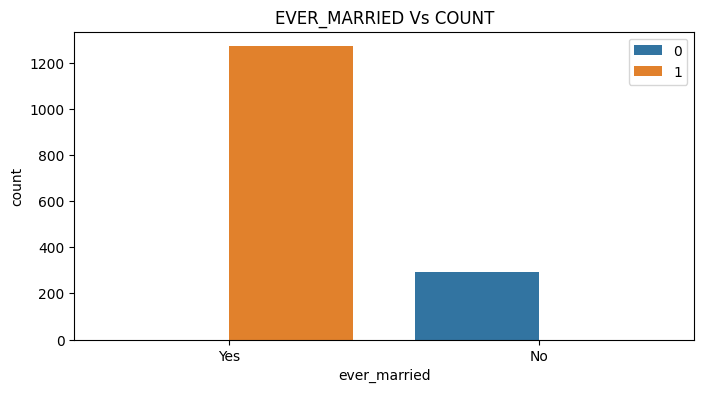

In [24]:
plot_category(df["ever_married"])

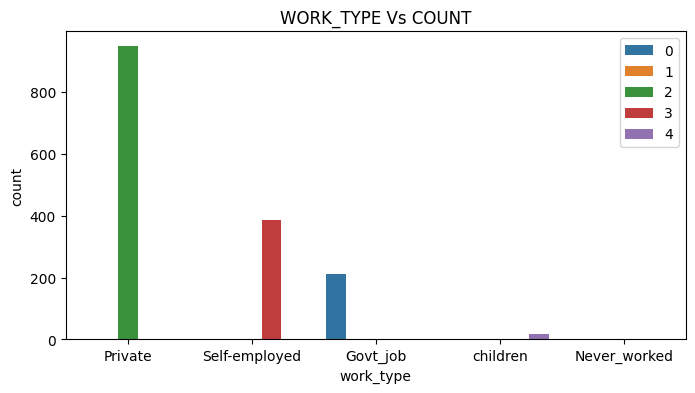

In [25]:
plot_category(df["work_type"])

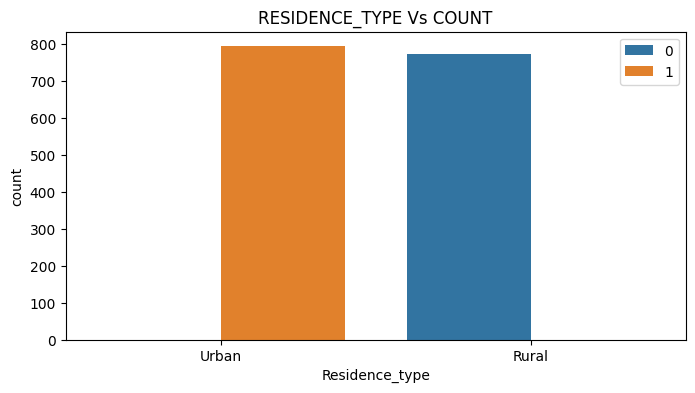

In [26]:
plot_category(df["Residence_type"])

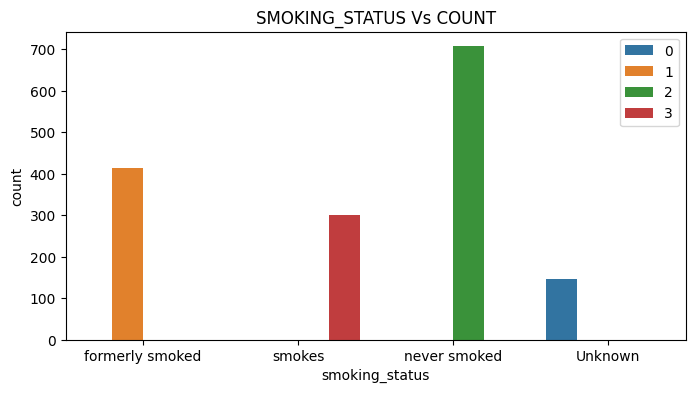

In [27]:
plot_category(df["smoking_status"])

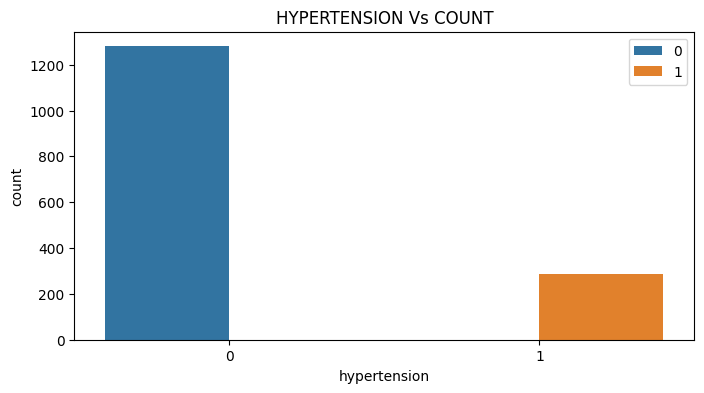

In [28]:
plot_category(df["hypertension"])

In [29]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.00000
mean,37026.351852,57.542989,0.182631,0.138570,118.734438,29.895091,0.50000
std,21092.599389,18.945568,0.386487,0.345607,54.724844,6.452892,0.50016
min,80.000000,1.320000,0.000000,0.000000,55.010000,11.500000,0.00000
25%,19186.750000,45.000000,0.000000,0.000000,78.487500,25.725000,0.00000
50%,36849.000000,60.000000,0.000000,0.000000,96.970000,29.700000,0.50000
75%,55567.250000,74.750000,0.000000,0.000000,149.300000,32.900000,1.00000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,64.400000,1.00000


In [30]:
from sklearn.preprocessing import LabelEncoder

def label_encoder_function(dataset):
  label_encoder = LabelEncoder()
  for column in dataset.columns:
    if dataset[column].dtype == "object":
      dataset[column] = label_encoder.fit_transform(dataset[column])
  return dataset
df = label_encoder_function(df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
26241,32328,1,72.0,0,0,1,2,1,111.88,26.200000,1,1
43027,2523,1,70.0,0,0,1,3,1,104.74,29.400000,3,0
34720,48211,0,61.0,1,1,1,2,1,251.99,41.400000,1,1
27028,66496,0,43.0,0,0,0,3,1,63.24,35.400000,2,0
3099,15102,1,78.0,1,0,1,2,1,75.32,29.895091,1,1


In [31]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer()
x = df.drop(["stroke", "id"], axis=1)
y = df["stroke"]
x = normalize.fit_transform(x)
x.shape, y.shape

((1566, 10), (1566,))

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)

### Performance Report Function

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def classification_reports(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  print(f"Accuracy Score {accuracy:.2f}")
  print(f"Precision Score {precision:.2f}")
  print(f"Recall Score {recall:.2f}")
  print(f"F1 Score {f1:.2f}")
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=[5, 4])
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='g',
              xticklabels=['Normal', 'Stroke'],
              yticklabels=['Normal', 'Stroke'])
  plt.title('Confusion Matrix')
  plt.show()

### Xgboost Model

Accuracy Score 0.75
Precision Score 0.72
Recall Score 0.74
F1 Score 0.73


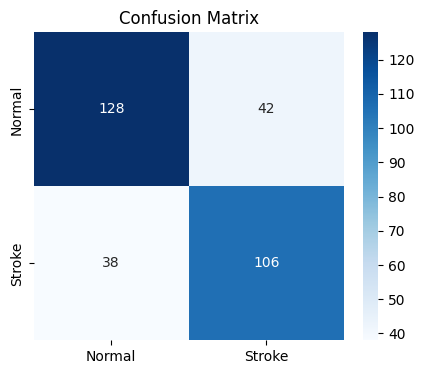

In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
classification_reports(y_test, y_pred)

### Random Forest

Accuracy Score 0.77
Precision Score 0.75
Recall Score 0.76
F1 Score 0.76


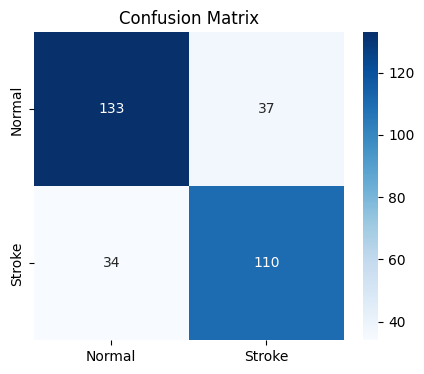

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
classification_reports(y_test, y_pred)

### SVM

Accuracy Score 0.73
Precision Score 0.66
Recall Score 0.83
F1 Score 0.74


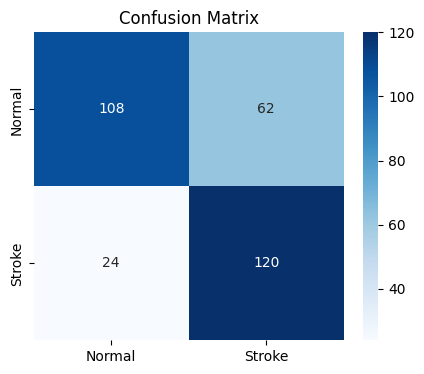

In [36]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
classification_reports(y_test, y_pred)

### KNN

Accuracy Score 0.66
Precision Score 0.69
Recall Score 0.49
F1 Score 0.57


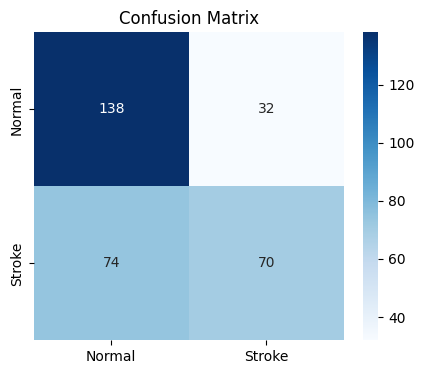

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
classification_reports(y_test, y_pred)

### Decision Tree

Accuracy Score 0.72
Precision Score 0.68
Recall Score 0.72
F1 Score 0.70


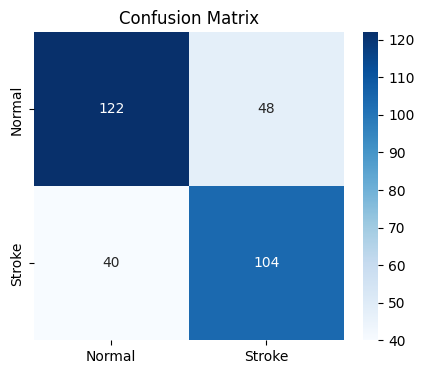

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
classification_reports(y_test, y_pred)

### Logistic Regression

Accuracy Score 0.69
Precision Score 0.65
Recall Score 0.70
F1 Score 0.68


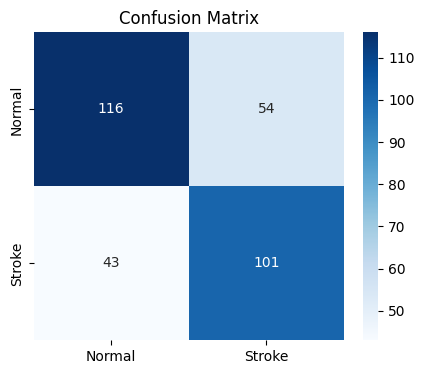

In [39]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
classification_reports(y_test, y_pred)

Accuracy Score 0.73
Precision Score 0.72
Recall Score 0.68
F1 Score 0.70


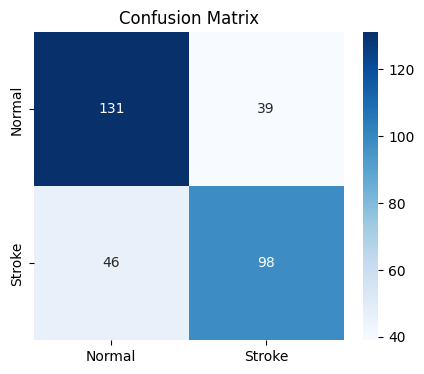

In [40]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
         ('rf', rf_model),
          ('dt', dt_model),
           ("knn", knn_model),
            ("svm", svm_model),
             ("xgb", xgb_model)],
    voting='hard')

voting_model.fit(x_train, y_train)
y_pred = voting_model.predict(x_test)
classification_reports(y_test, y_pred)

## Neural Networks

In [41]:
x_train.shape, y_train.shape

((1252, 10), (1252,))

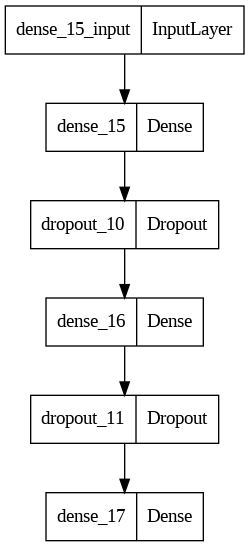

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    patience=5,
    monitor="val_loss",
    restore_best_weights=True
)

tf_model = Sequential([
    Dense(units=64, activation="relu", input_dim=10),
    Dropout(0.2),
    Dense(units=64, activation="relu"),
    Dropout(0.2),
    Dense(units=1, activation="sigmoid"),
])

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

hist = tf_model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    batch_size=32,
    # callbacks=[callback],
    verbose=0
)
tf.keras.utils.plot_model(tf_model)

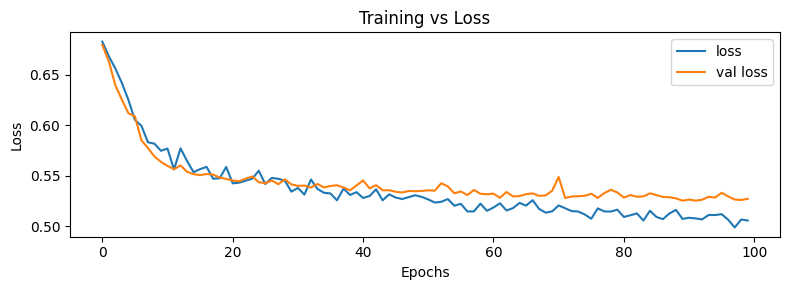

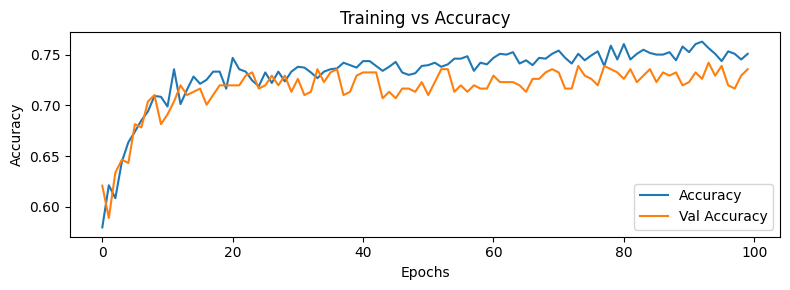

In [54]:
plt.figure(figsize=(8, 3))
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Loss")
plt.tight_layout()
plt.legend()

plt.figure(figsize=(8, 3))
plt.plot(hist.history["accuracy"], label="Accuracy")
plt.plot(hist.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Accuracy")
plt.tight_layout()
plt.legend()

plt.show()

10/10 [==============================] - 0s 2ms/step
Accuracy Score 0.74
Precision Score 0.68
Recall Score 0.79
F1 Score 0.73


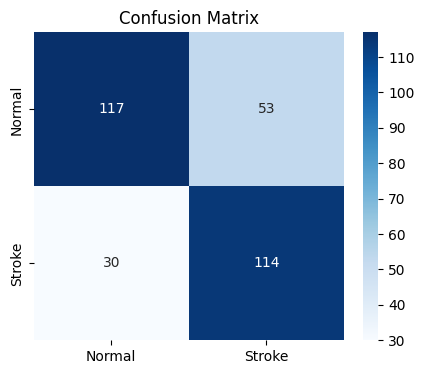

In [55]:
y_pred = tf_model.predict(x_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

classification_reports(y_test, y_pred)

### Saving Best Model Weights

In [56]:
import joblib

joblib.dump(rf_model, "RandomForest_Model")

['RandomForest_Model']

### Prediction Function

In [ ]:
import pandas as pd

def get_data(gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    data = pd.DataFrame([[
        gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status
    ]])
    return data

result = get_data(1, 3.0, 0, 0, 0, 4, 0, 95.12, 18.0, 0)
print(type(result))